In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

mnist = datasets.load_digits()

In [90]:
X = mnist['data']
y = mnist['target']

# Data Splitting

In [91]:
train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_train

array([[ 0.        , -0.3364527 , -0.04455828, ...,  0.04704305,
        -0.49833104, -0.19170759],
       [ 0.        , -0.3364527 ,  0.79794497, ...,  0.90058927,
         0.50813657, -0.19170759],
       [ 0.        , -0.3364527 ,  0.58731916, ..., -1.14792166,
        -0.49833104, -0.19170759],
       ...,
       [ 0.        , -0.3364527 , -0.67643571, ...,  0.38846154,
        -0.49833104, -0.19170759],
       [ 0.        , -0.3364527 ,  0.16606753, ..., -1.14792166,
        -0.49833104, -0.19170759],
       [ 0.        , -0.3364527 , -1.09768734, ..., -0.63579393,
        -0.49833104, -0.19170759]])

# Helper Functions

In [92]:
def conf_matrix_info(X_train_preds, y_scores):
    precision = precision_score(X_train_preds, y_scores, average='weighted')
    recall = recall_score(X_train_preds, y_scores, average='weighted')
    f1 = f1_score(X_train_preds, y_scores, average='weighted')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'f1: {f1}')

# SVC

In [93]:
svc = svm.SVC(kernel='linear', gamma='auto', C=2, random_state=42)

In [94]:
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.98281787 0.98269896 0.9825784  0.97902098 0.97887324]
0.9811978894047332


In [95]:
pred_scores = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')
pred_scores

array([[ 2.75314997,  4.71206444, -0.28222834, ...,  0.70171156,
         9.32008362,  8.25578758],
       [-0.30481144,  6.15473986,  9.30889309, ...,  0.71002416,
         6.29337468,  2.72769161],
       [ 0.70533729,  9.29283578,  2.76919077, ...,  4.76873828,
         8.31813025, -0.30723639],
       ...,
       [ 9.30789083, -0.31017793,  2.98662235, ...,  3.77186327,
         6.2843601 ,  7.2675005 ],
       [-0.29902281,  3.79808544,  5.19525792, ...,  9.31533798,
         5.2500186 ,  3.76675243],
       [ 7.2757502 ,  6.28504488, -0.31155137, ...,  5.26166867,
         4.26732475,  1.69537701]])

In [96]:
svc_preds_array = []

for i in pred_scores:
    svc_preds_array.append(i.argmax())

In [97]:
svc_matrix = confusion_matrix(y_train, svc_preds_array)
svc_matrix

array([[140,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 142,   0,   1,   0,   0,   0,   0,   0,   1],
       [  0,   0, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 152,   0,   0,   0,   0,   1,   1],
       [  0,   0,   0,   0, 140,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 138,   1,   0,   0,   2],
       [  0,   1,   0,   0,   1,   0, 137,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 140,   1,   1],
       [  0,   5,   0,   0,   0,   2,   0,   0, 134,   1],
       [  0,   0,   0,   2,   0,   2,   0,   0,   3, 142]])

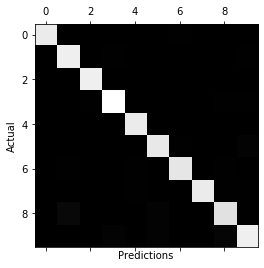

In [98]:
plt.matshow(svc_matrix, cmap=plt.cm.gray)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [99]:
conf_matrix_info(svc_preds_array, y_train)

Precision: 0.9792444548390792
Recall: 0.9791231732776617
f1: 0.9791385965961544


In [100]:
print(classification_report(svc_preds_array, y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       140
           1       0.99      0.96      0.97       148
           2       1.00      0.99      1.00       143
           3       0.98      0.98      0.98       155
           4       1.00      0.99      0.99       142
           5       0.98      0.97      0.98       142
           6       0.98      0.99      0.98       139
           7       0.98      1.00      0.99       140
           8       0.94      0.96      0.95       140
           9       0.95      0.96      0.96       148

    accuracy                           0.98      1437
   macro avg       0.98      0.98      0.98      1437
weighted avg       0.98      0.98      0.98      1437



# Linear SVC

In [101]:
linear_svc = svm.LinearSVC(penalty='l2', random_state=42, max_iter=5000)

In [102]:
scores = cross_val_score(linear_svc, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.97250859 0.9550173  0.93379791 0.95804196 0.96126761]
0.9561266730373561


In [103]:
linear_svc_pred = cross_val_predict(linear_svc, X_train, y_train, cv=5, method='decision_function')

In [104]:
linear_svc_preds_array = []

for i in linear_svc_pred:
    linear_svc_preds_array.append(i.argmax())

In [105]:
linear_svc_matrix = confusion_matrix(linear_svc_preds_array, y_train)
linear_svc_matrix

array([[140,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 136,   0,   0,   1,   1,   1,   0,   6,   0],
       [  0,   0, 141,   1,   0,   0,   0,   2,   1,   0],
       [  0,   2,   1, 147,   0,   0,   0,   0,   2,   2],
       [  1,   0,   0,   0, 136,   0,   0,   0,   1,   1],
       [  0,   1,   0,   2,   0, 136,   1,   0,   1,   2],
       [  0,   1,   0,   0,   0,   1, 136,   1,   3,   0],
       [  0,   0,   0,   1,   1,   1,   0, 138,   1,   2],
       [  0,   4,   0,   2,   1,   0,   0,   0, 125,   3],
       [  0,   0,   0,   2,   1,   2,   1,   2,   2, 139]])

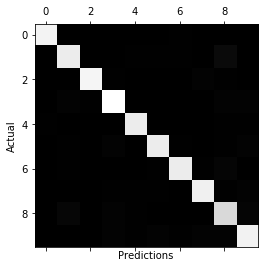

In [106]:
plt.matshow(linear_svc_matrix, cmap=plt.cm.gray)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [107]:
conf_matrix_info(linear_svc_preds_array, y_train)

Precision: 0.9566308283276054
Recall: 0.9561586638830898
f1: 0.9563156224329831


In [108]:
print(classification_report(linear_svc_preds_array, y_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.94      0.94      0.94       145
           2       0.99      0.97      0.98       145
           3       0.95      0.95      0.95       154
           4       0.97      0.98      0.97       139
           5       0.96      0.95      0.96       143
           6       0.97      0.96      0.96       142
           7       0.97      0.96      0.96       144
           8       0.88      0.93      0.90       135
           9       0.93      0.93      0.93       149

    accuracy                           0.96      1437
   macro avg       0.96      0.96      0.96      1437
weighted avg       0.96      0.96      0.96      1437

